### Question:
Conduct a linear regression model using the [bottle dataset](https://www.kaggle.com/sohier/calcofi) to answer the following question:
Is there a linear relationship between water salinity & water temperature?


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

In [35]:
bottle_df = pd.read_csv("Data/bottle.csv")[["Salnty", "T_degC"]]  # Dataset has NaNs. Dataset has numeric data
bottle_df = bottle_df.dropna()  # Dropping NaNs

### Creating Linear Model

In [3]:
# Creating values
x = bottle_df.T_degC.values
y = bottle_df.Salnty.values

Text(0, 0.5, 'Salinity')

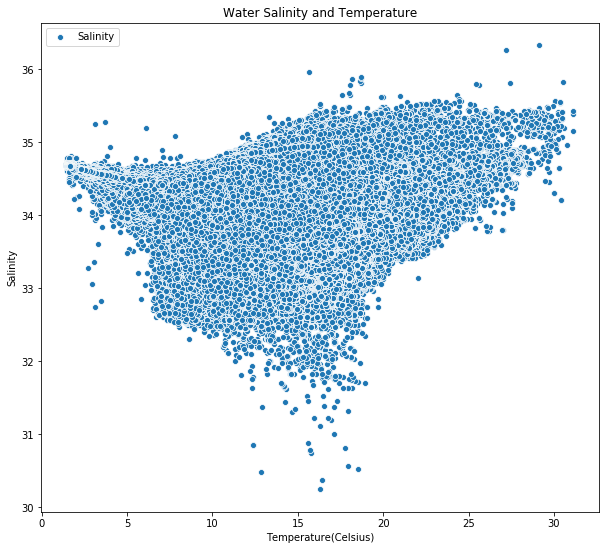

In [4]:
# Figure size
plt.figure(figsize=(10, 9))

# Scatter plot
sns.scatterplot(x, y, label="Salinity")

# Labels
plt.title("Water Salinity and Temperature")
plt.xlabel("Temperature(Celsius)")
plt.ylabel("Salinity")

In [64]:
# Instantiating
lr = LinearRegression(fit_intercept= False)
poly = PolynomialFeatures(degree=2)

Coefficients [ 3.53429862e+01 -2.32507063e-01  7.98720939e-03]
Intercepts 0.0


Text(0.5, 0, 'Temperature(Celsius)')

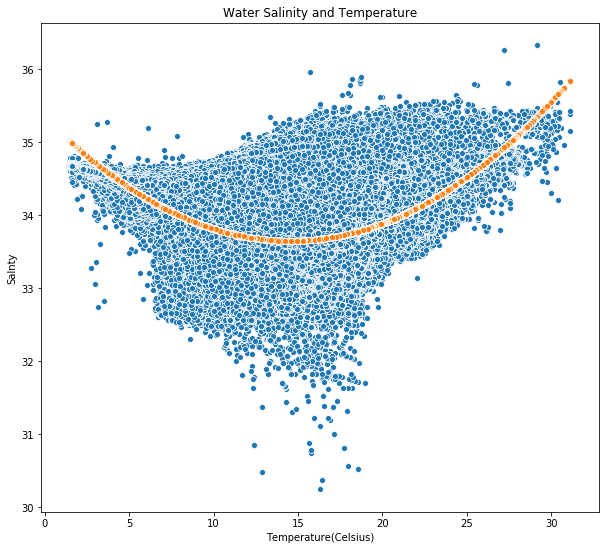

In [65]:
# Changing values to 2D
X = bottle_df["T_degC"].values.reshape((-1, 1))
y = bottle_df["Salnty"]

# model = sm.OLS(y, X).fit()
# predictions = model.predict(X) # make the predictions by the model
# # Print out the statistics

# Polynomial Regression model
X = poly.fit_transform(X)

# Linear Regression model
lr.fit(X, y, )
y_predict = lr.predict(X)
print("Coefficients", lr.coef_)
print("Intercepts", lr.intercept_)

# Graphing
plt.figure(figsize=(10, 9))
sns.scatterplot(x, y)
sns.scatterplot(x, y_predict)

# Label
plt.title("Water Salinity and Temperature")
plt.xlabel("Temperature(Celsius)")

In [67]:
res = y_predict - y

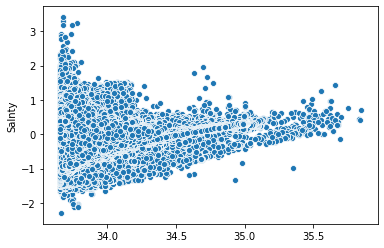

In [69]:
sns.scatterplot(y_predict, res)

In [62]:
lr.score(X,y)

-5051.522032428232

In [32]:
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salnty   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                 7.343e+04
Date:                Wed, 26 Feb 2020   Prob (F-statistic):               0.00
Time:                        14:17:30   Log-Likelihood:            -2.1098e+05
No. Observations:              374049   AIC:                         4.220e+05
Df Residuals:                  374047   BIC:                         4.220e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.3788      0.002   1.92e+04      0.000      34.375      34.382
x1            -0.0417      0.000   -270.984      0.000      -0.042      -0.041
==============================================================================
Omnibus:                    27431.162   Durbin-Watson:                   0.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            90090.929
Skew:                           0.353   Prob(JB):                         0.00
Kurtosis:                       5.298   Cond. No.                         30.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# Finding residuals squared sum
residuals = np.sum((y_predict - y)**2)
residuals

48131.85912985684

### Answer:
There is a quadratic relation between salinity and water temperature